### Frequency analysis

In [1]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from skimage.transform import resize
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter

# from scipy.signal import correlate2d
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat


from skimage.feature import match_template
from matplotlib.patches import Rectangle
# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

In [2]:
def imshow_gray(img, title, size=(20,20)):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=plt.cm.gray), plt.grid(False), plt.title(title)
    plt.show()

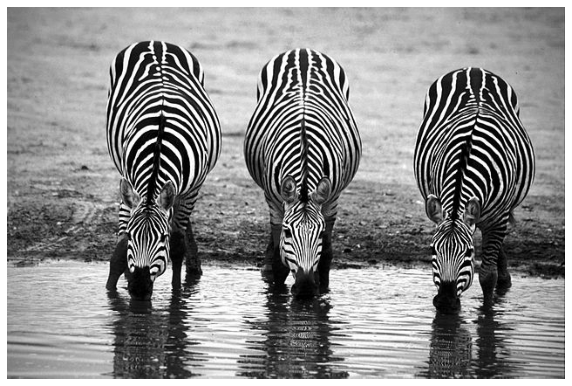

In [3]:
%matplotlib inline
zebras = rgb2gray(imread('images/3zebras.jpg'))

f1, ax1 = plt.subplots(figsize=(10,10))
ax1.imshow(zebras, cmap=plt.cm.gray), ax1.axis('off')
plt.show()


In [ ]:
zebras.shape

### Try a box filter

In [ ]:
padded_filt = np.zeros((427, 640))
padded_filt[205:216, 315:326] = np.ones((11,11))/121
imshow_gray(padded_filt, 'Small box filter', (10,10))

In [ ]:
fft_padded = fft2(padded_filt)

In [ ]:
imshow_gray(fftshift(abs(fft_padded)**0.5), 'FFT of small box', (10,10))

In [ ]:
# try a beautiful surface plot
# %matplotlib tk
f2, ax2 = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
X, Y = np.arange(fft_padded.shape[1]), np.arange(fft_padded.shape[0])
X, Y = np.meshgrid(X, Y)
surf = ax2.plot_surface(X, Y, fftshift(abs(fft_padded)**0.5), cmap=plt.cm.afmhot)

In [ ]:
# IFFT
%matplotlib inline
original_back = ifft2(fft_padded).real

f1, ax1 = plt.subplots(figsize=(10,10))
ax1.imshow(abs(original_back), cmap = plt.cm.gray), ax1.grid(False)
plt.show()

### Basis functions

In [4]:
def imshow_subplot(img, idx, title,):
    plt.subplot(idx)
    plt.imshow(img)
    plt.grid(False), plt.title(title)
    plt.show()
    

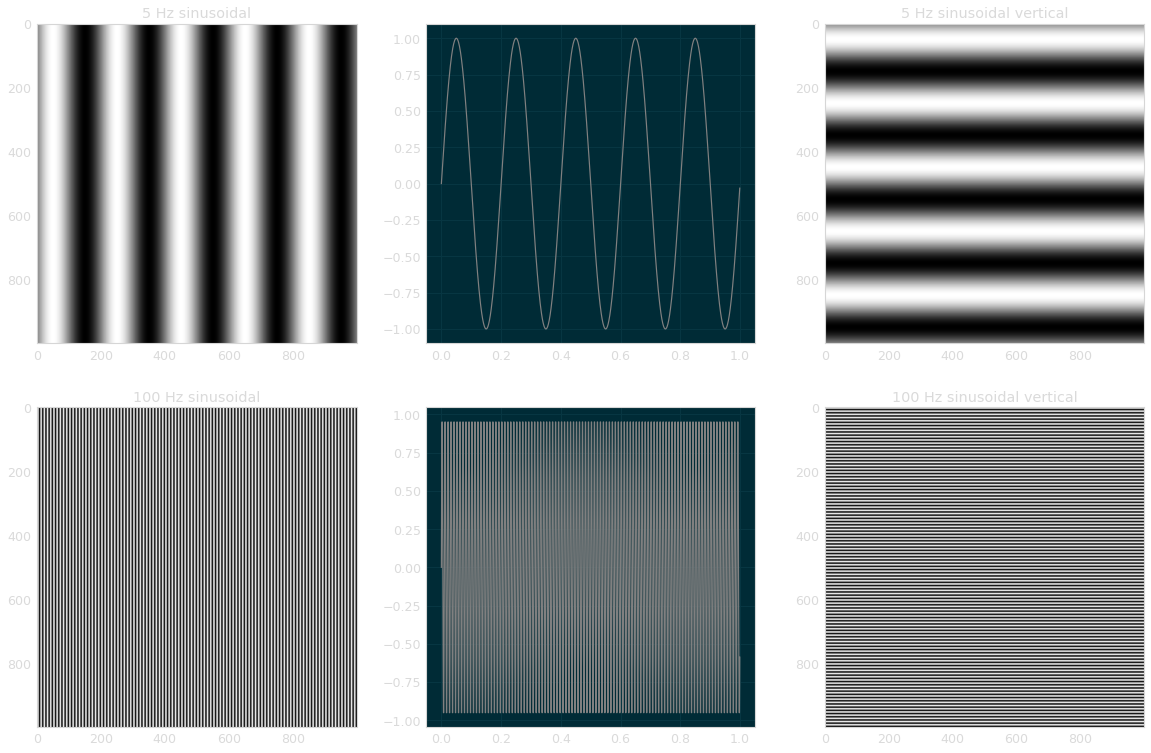

In [5]:
#let us define some basic sinusoidals
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid
f = 5 # simulated frequency
f2 = 100
sinusoidal_2D_5 = np.sin(2 * np.pi *f* n_x *ts)
sinusoidal_2D_5_v = np.sin(2 * np.pi *f* n_y *ts)
sinusoidal_5 = np.sin(2 * np.pi *f* x *ts )
sinusoidal_2D_100 = np.sin(2 * np.pi *f2* n_x *ts )
sinusoidal_2D_100_v = np.sin(2 * np.pi *f2* n_y *ts )
sinusoidal_100 = np.sin(2 * np.pi *f2* x *ts )

# Plot the results
plt.figure(figsize=(20, 20))
plt.set_cmap('gray')
plt.subplot(331), plt.imshow(sinusoidal_2D_5), plt.title('5 Hz sinusoidal'), plt.grid(False)
plt.subplot(332), plt.plot(x*ts,sinusoidal_5, color='gray')
plt.subplot(333), plt.imshow(sinusoidal_2D_5_v), plt.title('5 Hz sinusoidal vertical'), plt.grid(False)

plt.subplot(334), plt.imshow(sinusoidal_2D_100), plt.title('100 Hz sinusoidal'), plt.grid(False)
plt.subplot(335), plt.plot(x*ts,sinusoidal_100, color='gray')
plt.subplot(336), plt.imshow(sinusoidal_2D_100_v), plt.title('100 Hz sinusoidal vertical'), plt.grid(False)

plt.show()



### FFT of basis

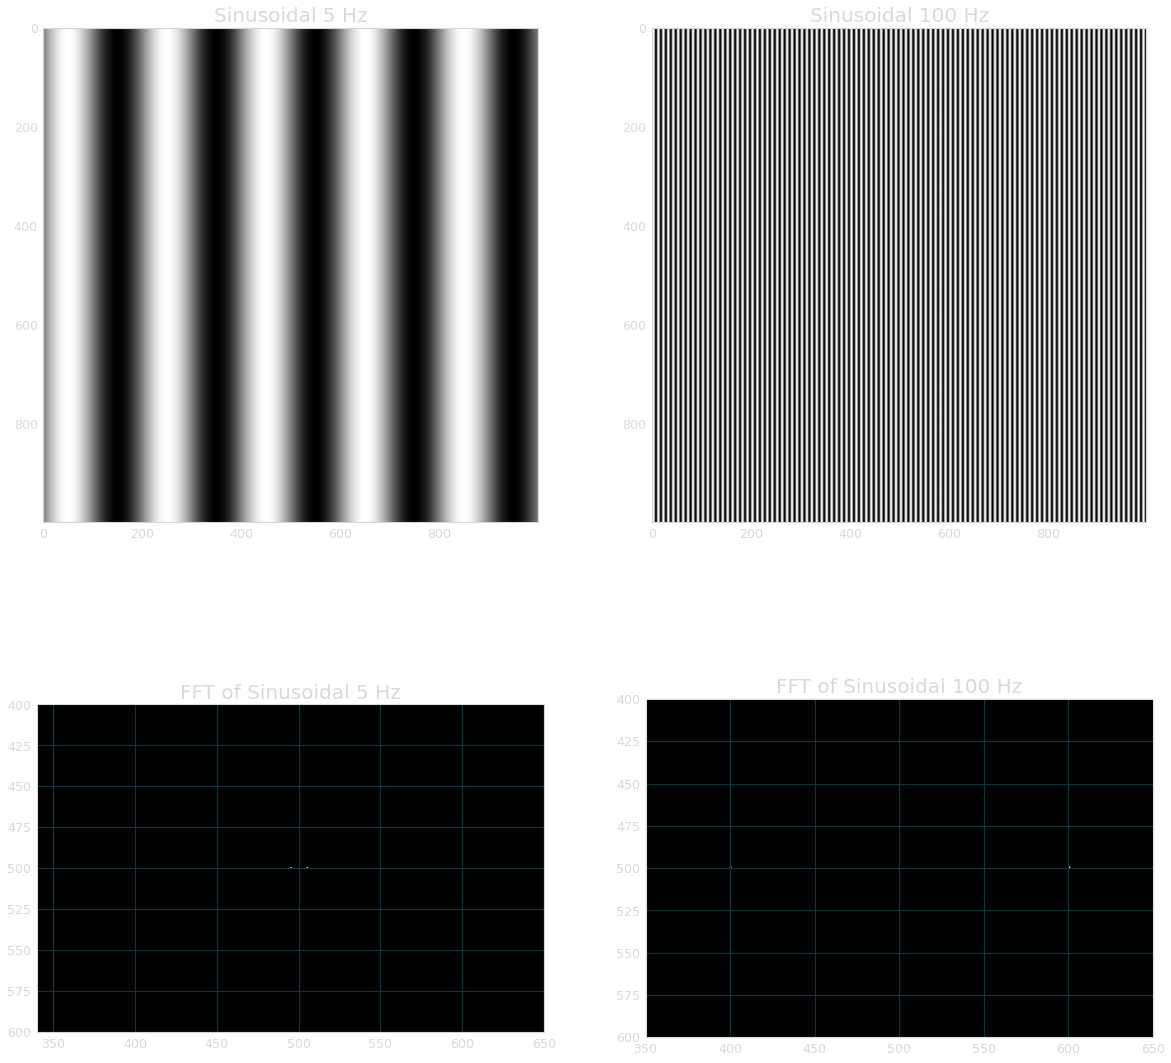

In [9]:
# %matplotlib tk
# jtplot.style(theme=None)
%matplotlib inline
fft_sin_5 = fft2(sinusoidal_2D_5)
fft_sin_5_v = fft2(sinusoidal_2D_5_v)
fft_sin_100 = fft2(sinusoidal_2D_100)
fft_sin_100_v = fft2(sinusoidal_2D_100_v)

plt.figure(figsize=(20,20))
plt.set_cmap('gray')

plt.subplot(221)
plt.imshow((sinusoidal_2D_5)), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(222)
plt.imshow(sinusoidal_2D_100), plt.grid(False), plt.title('Sinusoidal 100 Hz', size=20)


plt.subplot(223)
plt.imshow(fftshift(abs(fft_sin_5))), plt.title('FFT of Sinusoidal 5 Hz', size=20)
plt.xlim([340,650])
plt.ylim([600, 400])

plt.subplot(224)
plt.imshow(fftshift(abs(fft_sin_100))),  plt.title('FFT of Sinusoidal 100 Hz', size=20)
plt.xlim([350,650])
plt.ylim([600, 400])

plt.show()

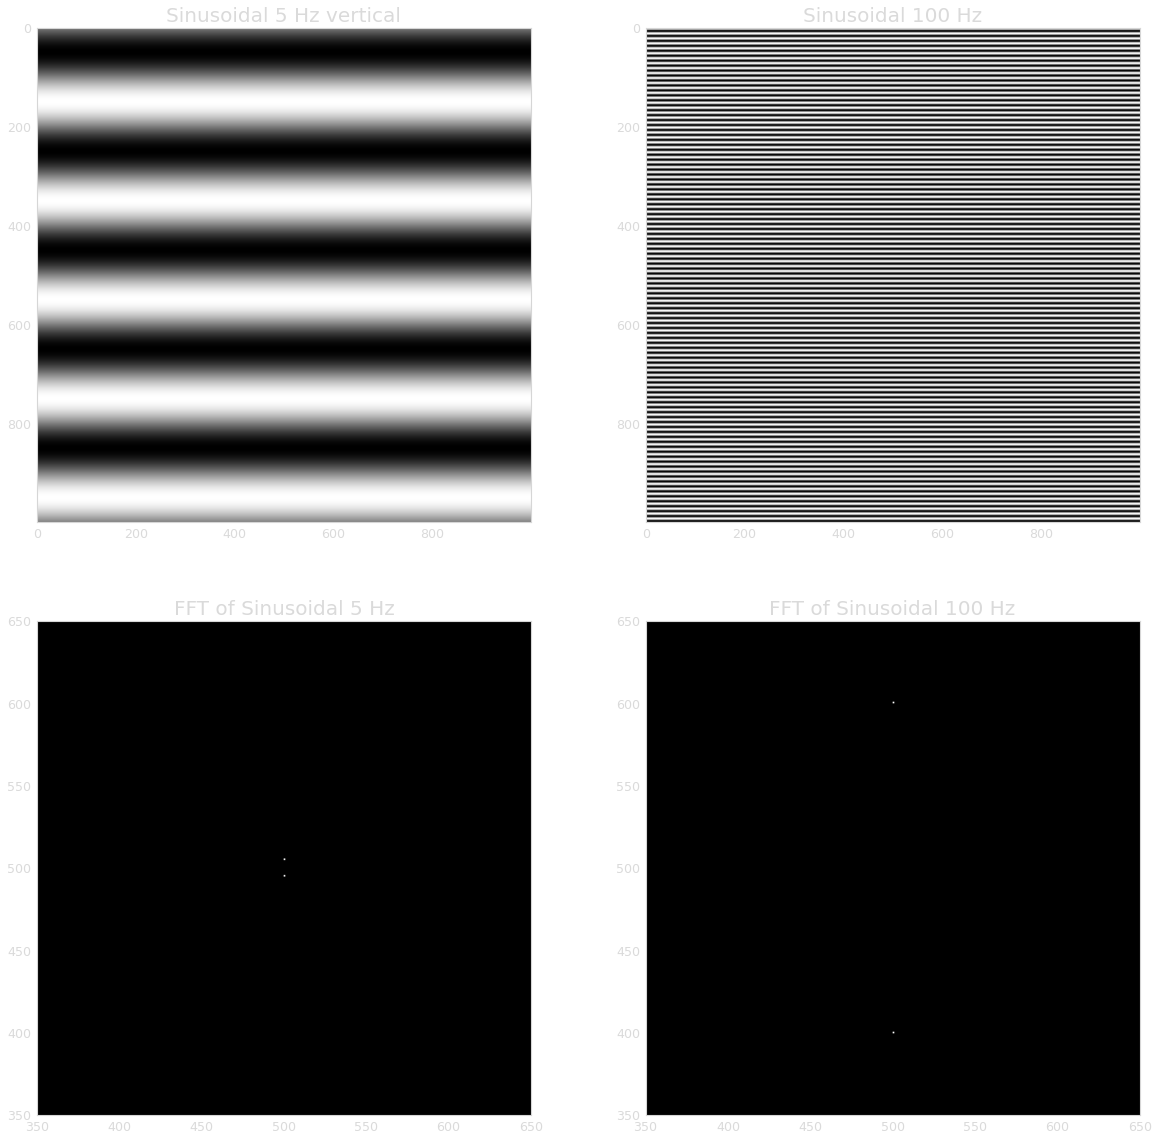

In [19]:
fft_sin_5_v = fft2(sinusoidal_2D_5_v)
# fft_sin_100_v =fft2(ifftshift(sinusoidal_2D_5_v))
fft_sin_100_v = fft2(sinusoidal_2D_100_v)

plt.figure(figsize=(20,20))
plt.set_cmap('gray')

plt.subplot(221)
plt.imshow(ifftshift(sinusoidal_2D_5_v)), plt.grid(False), plt.title('Sinusoidal 5 Hz vertical', size=20)
plt.subplot(222)
# plt.imshow(fftshift(sinusoidal_2D_5_v)), plt.grid(False), plt.title('Sinusoidal 100 Hz', size=20)
plt.imshow(sinusoidal_2D_100_v), plt.grid(False), plt.title('Sinusoidal 100 Hz', size=20)


plt.subplot(223)
plt.imshow(fftshift(abs(fft_sin_5_v))), plt.grid(False), plt.title('FFT of Sinusoidal 5 Hz', size=20)
plt.xlim([350,650])
plt.ylim([350, 650])

plt.subplot(224)
plt.imshow(fftshift(abs(fft_sin_100_v))), plt.grid(False), plt.title('FFT of Sinusoidal 100 Hz', size=20)
plt.xlim([350,650])
plt.ylim([350, 650])

plt.show()

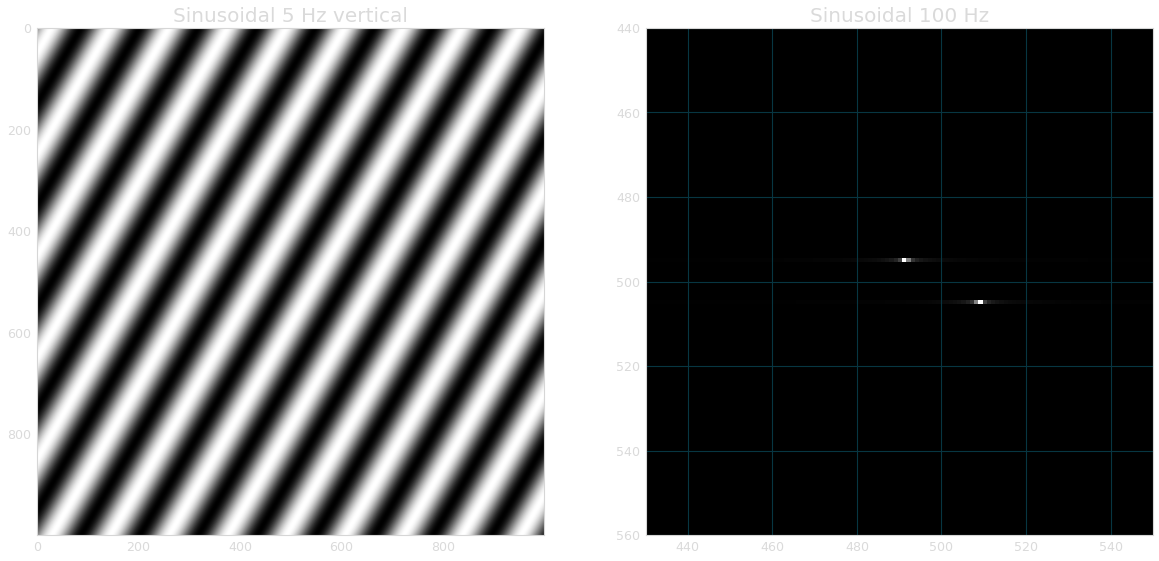

In [22]:
#let us define some basic sinusoidals, now with rotations
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid
f = 10 # simulated frequency
f2 = 100
rotation_angle = 30*np.pi/180
n_x_rotated = n_x*np.cos(rotation_angle)
n_y_rotated = n_y*np.sin(rotation_angle)
#compute rotated sinusoidal
sin_2D_5_rot = np.sin(2 * np.pi *f* ts *(n_x_rotated+n_y_rotated ))
fft_sin_2D_5_rot = fft2((sin_2D_5_rot))
# fft_sin_2D_5_rot = fft2(ifftshift(sin_2D_5_rot))

# Show the rotated sinusoidal
plt.figure(figsize=(20,10))
plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(sin_2D_5_rot), plt.grid(False), plt.title('Sinusoidal 5 Hz vertical', size=20)
plt.subplot(122)
plt.imshow(fftshift(abs(fft_sin_2D_5_rot))), plt.title('Sinusoidal 100 Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

### Composing sinusoidals by addition

In [ ]:
sin_5_plus_10 = sin_2D_5_rot + sinusoidal_2D_5
fft_sin_sum = fft2(sin_5_plus_10)

plt.figure(figsize=(20,30))
plt.set_cmap('gray')

plt.subplot(321)
plt.imshow(sin_2D_5_rot), plt.grid(False), plt.title(f'Sinusoidal {f} Hz rotated', size=20)
plt.subplot(322)
plt.imshow(fftshift(abs(fft_sin_2D_5_rot))), plt.title(f'FFT sinusoidal {f} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(323)
plt.imshow(sinusoidal_2D_5), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(324)
plt.imshow(fftshift(abs(fft_sin_5))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(325)
plt.imshow(sin_5_plus_10), plt.grid(False), plt.title('Sum result', size=20)
plt.subplot(326)
plt.imshow(fftshift(abs(fft_sin_sum))), plt.title('FFT sum result', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

In [ ]:
#what about doing ifft in FFT sum result

In [ ]:
sin_5_plus_10_plus_5v = sin_2D_5_rot + sinusoidal_2D_5 + sinusoidal_2D_5_v
fft_sin_sum_3 = fft2(sin_5_plus_10_plus_5v)

plt.figure(figsize=(20,40))
plt.set_cmap('gray')

plt.subplot(421)
plt.imshow(sin_2D_5_rot), plt.grid(False), plt.title(f'Sinusoidal {f} Hz rotated', size=20)
plt.subplot(422)
plt.imshow(fftshift(abs(fft_sin_2D_5_rot))), plt.title(f'FFT sinusoidal {f} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(423)
plt.imshow(sinusoidal_2D_5), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(424)
plt.imshow(fftshift(abs(fft_sin_5))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(425)
plt.imshow(sinusoidal_2D_5_v), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(426)
plt.imshow(fftshift(abs(fft_sin_5_v))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(427)
plt.imshow(sin_5_plus_10_plus_5v), plt.grid(False), plt.title('Sum result', size=20)
plt.subplot(428)
plt.imshow(fftshift(abs(fft_sin_sum_3))), plt.title('FFT sum result', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

In [ ]:
#IFFT

ifft_sum_3 = ifft2(fft_sin_sum_3).real

plt.figure(figsize = (20,15))
plt.set_cmap('gray')

plt.subplot(131)
plt.imshow(((sin_5_plus_10_plus_5v))), plt.title(f'Original Sinusoidal ', size=20), plt.grid(False)

plt.subplot(132)
plt.imshow(ifftshift(abs(fft_sin_sum_3))), plt.title(f'FFT sinusoidal Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(133)
plt.imshow(((ifft_sum_3))), plt.title(f' Recovered Sinusoidal ', size=20), plt.grid(False)
plt.show()

In [ ]:
#let us define some basic sinusoidals, now with rotations
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid

A = [0.25, 0.5, 0.25, 1, 1, 1]
F = [4, 10, 8, 25, 15, 30]
angles = [10, 0, 90, 20, 45, 80]

sinusoidals=np.zeros(n_x.shape)
for a, f, ph in zip(A, F, angles):
    rot_angle = ph*np.pi/180
    rotated_grid = n_x*np.cos(rot_angle) + n_y*np.sin(rot_angle)
    sinusoidals += a*np.sin(2*np.pi*f*ts*rotated_grid)
sinusoidals += .45 #adding a constant

fft_sin_2D_sums = fft2(sinusoidals)

plt.figure(figsize = (20,10))
plt.set_cmap('gray')

plt.subplot(121)
plt.imshow(sinusoidals), plt.grid(False), plt.title(f'Sinusoidal {F} Hz rotated', size=20)
plt.subplot(122)
plt.imshow(fftshift(abs(fft_sin_2D_sums))), plt.title(f'FFT sinusoidal {F} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

### What about a real image

In [2]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from skimage.transform import resize
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
# from scipy.signal import correlate2d
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat

# from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

from skimage.feature import match_template
from matplotlib.patches import Rectangle
# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

In [3]:
zebras = rgb2gray(imread('images/3zebras.jpg'))
zebras = zebras[:, 115:542]
zebras = resize(zebras, (251,251))
# zebras = zebras[:-1, :]

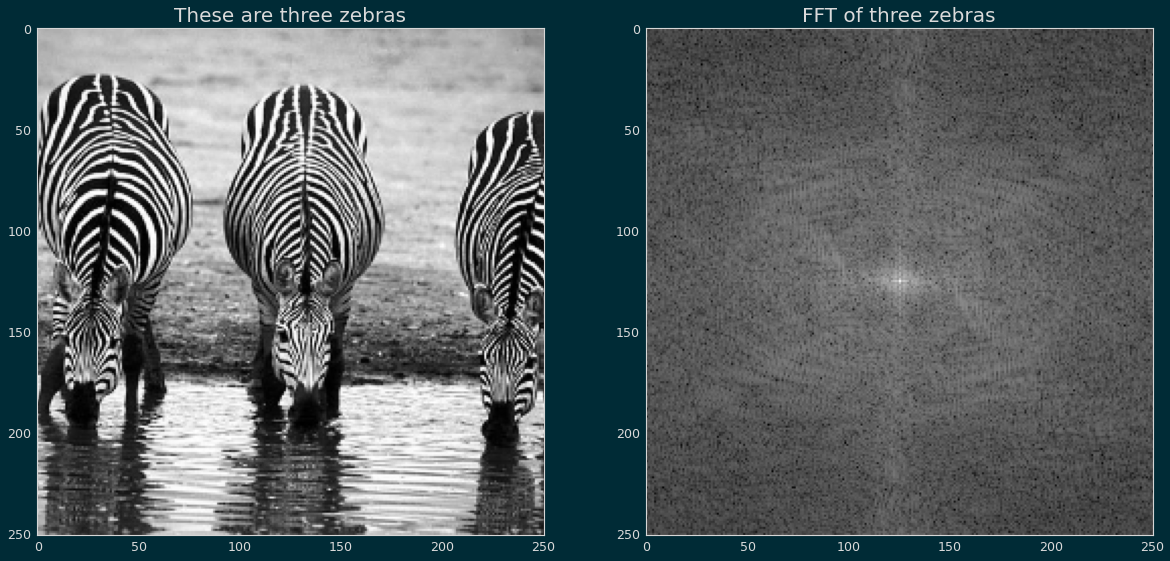

In [4]:
fft2_zebras = (fft2(zebras))

plt.figure(figsize = (20,10))
plt.set_cmap('gray')

plt.subplot(121)
plt.imshow(zebras), plt.grid(False), plt.title(f'These are three zebras', size=20)
plt.subplot(122)
# plt.imshow(fftshift(np.log(abs(fft2_zebras)))), plt.grid(False) , plt.title(f'FFT of three zebras', size=20)
plt.imshow(fftshift(abs(fft2_zebras))**0.03), plt.grid(False), plt.title(f'FFT of three zebras', size=20)

plt.show()

In [5]:
zebras.shape

(251, 251)

In [6]:
zebras_length = len(zebras)
origin_pixel = (zebras_length - 1)//2
coordinates_left = ((x, y) for x in range(zebras_length) for y in range(origin_pixel+1))

def distances(coordinates, origin):
    return np.hypot((coordinates[0]-origin), (coordinates[1]-origin))
sorted_coordinates =  sorted(coordinates_left, key=lambda x: distances(x, origin_pixel))

def find_fft_pair(coordinates, origin):
    return ((origin-coordinates[0]) + origin, (origin-coordinates[1]) + origin)

def show_reconstructions(sinusoidal, reconstructed, p, i):
        plt.subplot(1, 2, 1)
        plt.imshow(sinusoidal), plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed), plt.axis('off')
        plt.pause(p)
        plt.title(f'Iteration {i}')
        plt.show()

def decompose_image(zebras):
    reconstructed_image = np.zeros_like(zebras)
    reconstructed_sinusoidal = np.zeros_like(zebras)
    fft_component = np.zeros_like(zebras, dtype='complex')
    fft2_zebras = fftshift(fft2(ifftshift(zebras)))

    plt.set_cmap('gray')
    for i, coordinates in enumerate(sorted_coordinates):
        #check if we are in centre column
        if (coordinates[1] == origin_pixel and coordinates[0] > origin_pixel):continue 
            # find the right hand side fft pair
        fft_pair = find_fft_pair(coordinates, origin_pixel)
        #place extracted coordinates of zebras in fft and then in empty 2d array
        fft_component[coordinates] = (fft2_zebras[coordinates])
        fft_component[fft_pair] = (fft2_zebras[fft_pair])
        # compute ifft
        reconstructed_sinusoidal = fftshift(ifft2(ifftshift(fft_component))).real
        reconstructed_image += reconstructed_sinusoidal
        # clear 
        fft_component[coordinates] = 0
        fft_component[fft_pair] = 0
        #display the images
        if i < 200 and i%5==0:
            show_reconstructions(reconstructed_sinusoidal, reconstructed_image, 1e-4, i)
        elif i < 500 and i % 20 == 0:
            show_reconstructions(reconstructed_sinusoidal, reconstructed_image, 1e-4, i)
        elif i < 30000 and i % 2000 == 0:
            show_reconstructions(reconstructed_sinusoidal, reconstructed_image, 1e-4, i)
        elif i>=30000 and i%10 ==0:
            show_reconstructions(reconstructed_sinusoidal, reconstructed_image, 1e-4, i)
            
    return reconstructed_image

In [7]:
%matplotlib tk
reconstructed_image = decompose_image(zebras)

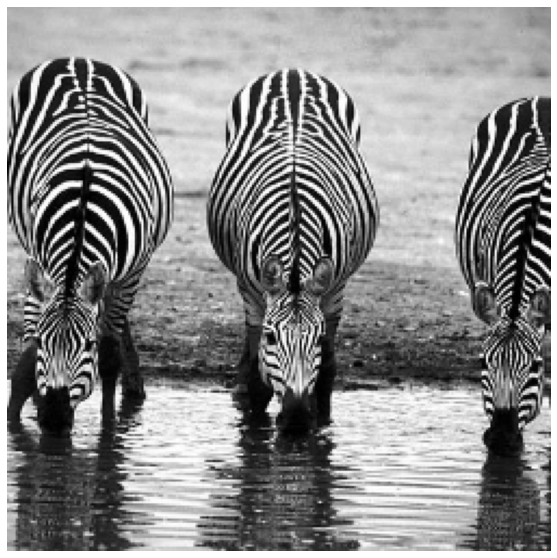

In [6]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(reconstructed_image, cmap=plt.cm.gray), plt.axis('off')
plt.show()

### Low pass filter

In [6]:
def gaussian_filter2(size=(3,3), sigma=1):
    rows, cols = (size[0]-1)/2, (size[1]-1)/2
    [r, c] = np.mgrid[-rows:rows+1, -cols:cols+1]
    squares = r**2 + c**2
    f = np.exp(-squares/(2*sigma**2))
    #add extra axis for color filter, not needed for grayscale
    return f/f.sum()

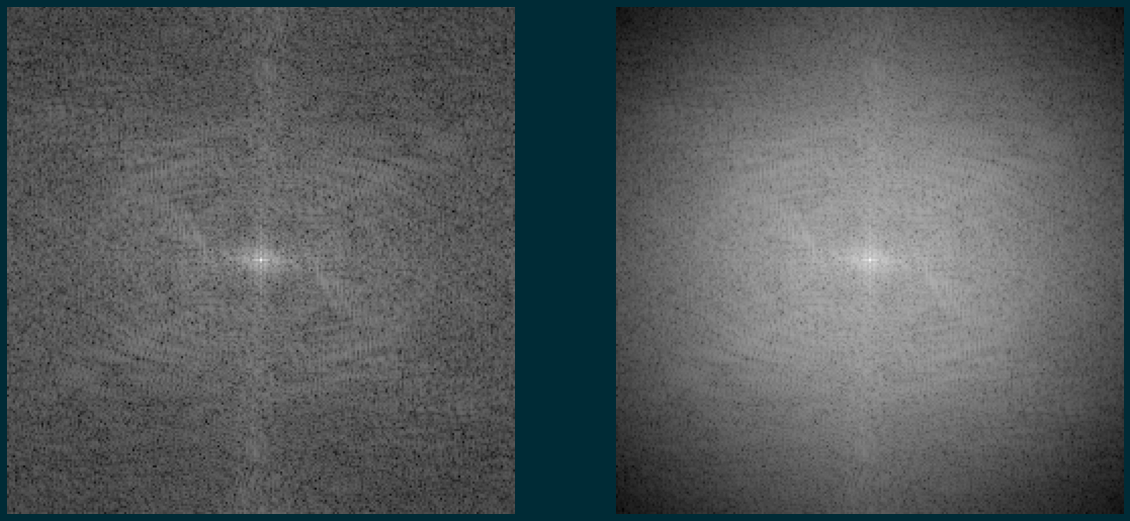

In [31]:
filt1 = gaussian_filter2(fft2_zebras.shape, sigma=40)
filtered_z = ifftshift(filt1) * fft2_zebras
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(fftshift(abs(fft2_zebras)**0.03)), plt.axis('off')
plt.subplot(122)
plt.imshow(fftshift(abs(filtered_z)**0.03)), plt.axis('off')
plt.show()

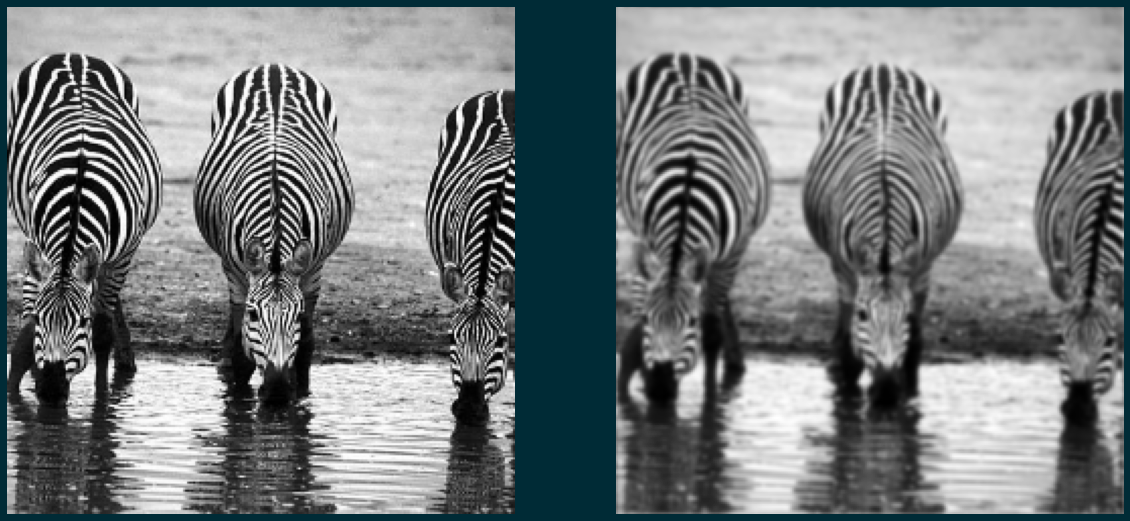

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(zebras), plt.axis('off')
plt.subplot(122)
plt.imshow(ifft2(filtered_z).real), plt.axis('off')
plt.show()